In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
v = pd.read_csv("../../data/processed/V.csv")
fgr = pd.read_csv("../../data/processed/FGR.csv", decimal=",")

In [3]:
v.drop(columns=["Unnamed: 0"], inplace=True)

# Gerando variavel demanda diaria por linha

In [4]:
demanda_p_linha_dia = v.groupby(["linha_numero", "movimento_diario_data_mov"]).count()["passageiro_matricula"].to_frame().reset_index()
demanda_p_linha_dia.rename(columns={"passageiro_matricula": "demanda_do_dia"}, inplace = True)

In [10]:
demanda_p_linha_dia

,linha_numero,movimento_diario_data_mov,demanda_do_dia
0,1,2021-08-29,232
1,1,2021-08-31,9096
2,1,2021-09-01,8888
3,1,2021-09-02,8244
4,1,2021-09-03,9020
...,...,...,...
2078,942,2021-09-05,2
2079,991,2021-08-31,76
2080,991,2021-09-01,55
2081,991,2021-09-02,55


# Validação Hipótese
##### O tamanho do trajeto se correlaciona positivamente com a demanda.

In [6]:
fgr

,Unnamed: 0,fechamento_data,empresa_numero,empresa_nome,linha_numero,linha_nome,linha_km_programado,linha_km_adotado,linha_eficiencia,passageiro_grupo,passageiro_demanda,passageiro_arrecadacao,passageiro_arrecadacao_prevista
0,0,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Vale Transporte BUM,14,47.2,49.2
1,1,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Gratuidade,27,0.0,0.0
2,2,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Vale Transporte,1636,5654.4,5654.4
3,3,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Gratuidade p/ deficiente,140,0.0,0.0
4,4,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Meia,193,298.0,298.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17525,2036,2021-09-07,67,COOTRAPS - Coop. dos Transp. Aut. de Pas,757,Vila Velha/Centro,855.00,700.56,81.94,Gratuidade,44,0.0,0.0
17526,2037,2021-09-07,67,COOTRAPS - Coop. dos Transp. Aut. de Pas,757,Vila Velha/Centro,855.00,700.56,81.94,Vale Transporte,767,2657.4,2657.4
17527,2038,2021-09-07,67,COOTRAPS - Coop. dos Transp. Aut. de Pas,757,Vila Velha/Centro,855.00,700.56,81.94,Gratuidade p/ deficiente,21,0.0,0.0
17528,2039,2021-09-07,67,COOTRAPS - Coop. dos Transp. Aut. de Pas,757,Vila Velha/Centro,855.00,700.56,81.94,Vale Transporte BUM,8,26.8,28.8


In [5]:
linha_p_km_programado = fgr[["fechamento_data", "linha_numero", "linha_km_programado"]].drop_duplicates()

In [6]:
linha_p_km_programado = linha_p_km_programado[linha_p_km_programado.linha_km_programado != 0]

In [7]:
linha_demanda_km = demanda_p_linha_dia.merge(linha_p_km_programado, how="inner", left_on=["linha_numero", "movimento_diario_data_mov"], right_on=["linha_numero","fechamento_data"])
linha_demanda_km.drop(columns=["fechamento_data"], inplace=True)
linha_demanda_km = linha_demanda_km.groupby(["linha_numero", "movimento_diario_data_mov"]).mean()

<AxesSubplot:>

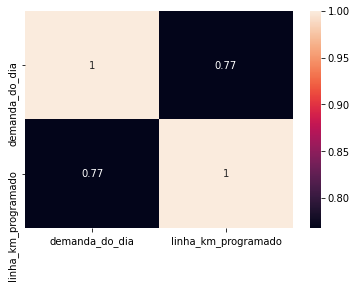

In [8]:
sb.heatmap(linha_demanda_km.corr(), annot=True)

Conclusão: o tamanho do trajeto se correlaciona positivamente com a demanda.

##### O tipo de passagem mais utilizada na linha influencia na demanda da mesma.

In [11]:
fgr.groupby(["linha_numero", "fechamento_data"]).max()["passageiro_grupo"].to_frame().reset_index().passageiro_grupo.value_counts()

Vale Transporte BUM    1670
Vale Transporte         304
Gratuidade                8
Name: passageiro_grupo, dtype: int64

In [12]:
linhas_max_tip_passageiro = fgr.groupby(["linha_numero", "fechamento_data"]).max()["passageiro_grupo"].to_frame().reset_index()

In [13]:
fgr[(fgr.linha_numero == 1) & (fgr.fechamento_data == "2021-09-07")]

,Unnamed: 0,fechamento_data,empresa_numero,empresa_nome,linha_numero,linha_nome,linha_km_programado,linha_km_adotado,linha_eficiencia,passageiro_grupo,passageiro_demanda,passageiro_arrecadacao,passageiro_arrecadacao_prevista
16383,894,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Inteira,1174,4226.4,4226.4
16384,895,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Meia,115,181.6,181.6
16385,896,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Gratuidade,1,0.0,0.0
16386,897,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Vale Transporte,79,270.0,270.0
16387,898,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Integracao,8,0.0,0.0
16388,899,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Vale Transporte BUM,1,3.6,3.6
17221,1732,2021-09-07,36,Santa Cecília Transportes Ltda.,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Gratuidade,606,2116.8,2116.8
17222,1733,2021-09-07,36,Santa Cecília Transportes Ltda.,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Vale Transporte,2228,7722.6,7722.6
17223,1734,2021-09-07,36,Santa Cecília Transportes Ltda.,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Meia,163,247.6,247.6
17224,1735,2021-09-07,36,Santa Cecília Transportes Ltda.,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Vale Transporte BUM,249,460.2,864.2


In [14]:
linha_demanda_tip_passageiro = demanda_p_linha_dia.merge(linhas_max_tip_passageiro, how="inner", left_on=["linha_numero", "movimento_diario_data_mov"], right_on=["linha_numero","fechamento_data"])
linha_demanda_tip_passageiro.drop(columns=["fechamento_data"], inplace = True)
linha_demanda_tip_passageiro.rename(columns={"passageiro_grupo": "tip_pass_mais_freq"}, inplace = True)

In [15]:
linha_demanda_tip_passageiro

,linha_numero,movimento_diario_data_mov,demanda_do_dia,tip_pass_mais_freq
0,1,2021-09-01,8888,Vale Transporte BUM
1,1,2021-09-02,8244,Vale Transporte BUM
2,1,2021-09-03,9020,Vale Transporte BUM
3,1,2021-09-04,6572,Vale Transporte BUM
4,1,2021-09-05,4167,Vale Transporte BUM
...,...,...,...,...
1725,920,2021-09-05,2350,Vale Transporte BUM
1726,920,2021-09-06,2345,Vale Transporte BUM
1727,991,2021-09-01,55,Vale Transporte BUM
1728,991,2021-09-02,55,Vale Transporte BUM


In [16]:
linha_demanda_tip_passageiro.describe()

,linha_numero,demanda_do_dia
count,1730.000000,1730.000000
mean,382.506936,1736.750867
std,262.673196,1982.421598
min,1.000000,1.000000
25%,108.000000,502.000000
50%,357.000000,1070.000000
75%,631.000000,2095.250000
max,999.000000,15203.000000


(2095 - 502)*1.5 + 2095 = Limite Superior = 4485

In [17]:
linha_demanda_tip_passageiro.query("demanda_do_dia <= 4485", inplace=True)

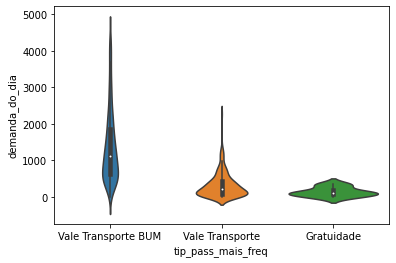

In [18]:
sb.violinplot(data=linha_demanda_tip_passageiro, x="tip_pass_mais_freq", y="demanda_do_dia");

Devido ao desbalanceamento, não podemos considerar o tipo de passageiro mais frequente como algo que se correlaciona com a demanda.

##### A demanda é maior entre os horários de 06h às 09h e 17h às 19h em comparação aos outros.

In [19]:
v.head()

,movimentos_data_arq,movimento_diario_data_mov,categoria_tipo,empresa_codigo,empresa_modalidade,veiculo_numero,veiculo_validador,linha_numero,linha_jornada,linha_num_operador,...,passageiro_data_hora,passageiro_integracao_bum,passageiro_valor_subsidio,passageiro_evento,passageiro_sigben,passageiro_integracao,passageiro_valor_pago,passageiro_tipo,passageiro_matricula,passageiro_valor_repasse_metro
0,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,2021-08-26T05:37:51,0,0,4219114872,0,0,3.6,4,7308696,0.0
1,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,2021-08-26T05:40:11,0,0,4219114873,0,0,3.6,4,6423497,0.0
2,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,2021-08-26T05:40:16,0,0,4219114874,0,0,3.6,12,5063339,0.0
3,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,2021-08-26T05:41:06,0,0,4219114875,0,0,3.6,4,4792159,0.0
4,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,2021-08-26T05:42:21,0,0,4219114876,0,0,3.6,4,3125993,0.0


In [20]:
v.passageiro_data_hora.describe()

count                 3641303
unique                 486947
top       2021-09-02T06:25:39
freq                       38
Name: passageiro_data_hora, dtype: object

In [21]:
v["passageiro_data_hora"]

0          2021-08-26T05:37:51
1          2021-08-26T05:40:11
2          2021-08-26T05:40:16
3          2021-08-26T05:41:06
4          2021-08-26T05:42:21
                  ...         
3641298    2021-09-06T19:14:25
3641299    2021-09-06T19:22:11
3641300    2021-09-06T19:22:30
3641301    2021-09-06T19:34:20
3641302    2021-09-07T00:00:03
Name: passageiro_data_hora, Length: 3641303, dtype: object

In [22]:
v["passageiro_data_hora"] = pd.to_datetime(v["passageiro_data_hora"])

In [23]:
v["passageiro_hora_entrada"] = v["passageiro_data_hora"].dt.hour

<AxesSubplot:>

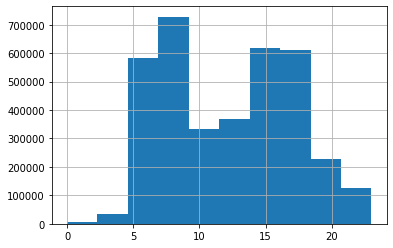

In [24]:
v["passageiro_hora_entrada"].hist()

In [46]:
v["passageiro_hora_range"] = pd.cut(v["passageiro_hora_entrada"], bins=[-1, 4, 6, 9, 12, 15, 18, 21, float('Inf')], labels=['00-3h59', '4-5h59', '6-8h59', '9-11h59', '12-14h59', '15-17h59', '18-20h59', '21-23h59'])

In [47]:
v["passageiro_hora_range"].value_counts()

15-17h59    869222
6-8h59      728089
4-5h59      584428
12-14h59    534716
9-11h59     527937
18-20h59    285469
21-23h59     69756
00-3h59      41686
Name: passageiro_hora_range, dtype: int64

In [48]:
v["passageiro_hora_range"].isnull().sum()

0

In [29]:
v

,movimentos_data_arq,movimento_diario_data_mov,categoria_tipo,empresa_codigo,empresa_modalidade,veiculo_numero,veiculo_validador,linha_numero,linha_jornada,linha_num_operador,...,passageiro_valor_subsidio,passageiro_evento,passageiro_sigben,passageiro_integracao,passageiro_valor_pago,passageiro_tipo,passageiro_matricula,passageiro_valor_repasse_metro,passageiro_hora_entrada,passageiro_hora_range
0,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114872,0,0,3.6,4,7308696,0.0,5,00-5h59
1,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114873,0,0,3.6,4,6423497,0.0,5,00-5h59
2,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114874,0,0,3.6,12,5063339,0.0,5,00-5h59
3,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114875,0,0,3.6,4,4792159,0.0,5,00-5h59
4,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114876,0,0,3.6,4,3125993,0.0,5,00-5h59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641298,2021-09-07,2021-09-06,1,67,2,67959,860E,359,1,171678,...,0,4222094572,0,0,0.0,16,6543500,0.0,19,18-20h59
3641299,2021-09-07,2021-09-06,1,67,2,67959,860E,359,1,171678,...,0,4222094573,0,0,3.6,4,8747915,0.0,19,18-20h59
3641300,2021-09-07,2021-09-06,1,67,2,67959,860E,359,1,171678,...,0,2258250790,0,0,3.6,0,0,0.0,19,18-20h59
3641301,2021-09-07,2021-09-06,1,67,2,67959,860E,359,1,171678,...,0,0,0,3,0.0,0,0,0.0,19,18-20h59


In [49]:
v_hora_range = v.groupby(["linha_numero", "movimento_diario_data_mov", "passageiro_hora_range"]).count()["passageiro_matricula"].to_frame().reset_index()

In [50]:
v_hora_range.dropna(inplace=True)

In [51]:
v_hora_range

,linha_numero,movimento_diario_data_mov,passageiro_hora_range,passageiro_matricula
73,1,2021-08-29,4-5h59,4.0
74,1,2021-08-29,6-8h59,74.0
75,1,2021-08-29,9-11h59,97.0
76,1,2021-08-29,12-14h59,57.0
88,1,2021-08-31,00-3h59,150.0
...,...,...,...,...
47973,991,2021-08-31,15-17h59,75.0
47981,991,2021-09-01,15-17h59,55.0
47989,991,2021-09-02,15-17h59,55.0
48164,999,2021-09-05,12-14h59,82.0


In [52]:
import plotly.express as px

fig = px.violin(v_hora_range, y="passageiro_matricula", x="passageiro_hora_range", box=True,
          hover_data=v_hora_range.columns)
fig.show()

**00h - 3h59**

75%  das rotas tiverem até  43 pessoas

25%  das rotas tiverem até  5 pessoas

---
**4h-5h59**

75%  das rotas tiverem até  415 pessoas

25%  das rotas tiverem até  100 pessoas

---
**06h - 8h59**

75%  das rotas tiverem até  451 pessoas

25%  das rotas tiverem até  126 pessoas

---
**09h - 11h59**

75%  das rotas tiverem até  342 pessoas

25%  das rotas tiverem até  96 pessoas

---
**12h - 14h59**

75%  das rotas tiverem até  332 pessoas

25%  das rotas tiverem até  76 pessoas

---
**15h - 17h59**

75%  das rotas tiverem até  516 pessoas

25%  das rotas tiverem até  112 pessoas

---
**18 - 20h59**

75%  das rotas tiverem até  164 pessoas

25%  das rotas tiverem até  33 pessoas

---
**21 - 23h59**

75%  das rotas tiverem até  40 pessoas

25%  das rotas tiverem até  7 pessoas



In [53]:
v_hora_range_dummies = pd.get_dummies(v_hora_range["passageiro_hora_range"])

In [54]:
v_hora_range = pd.concat([v_hora_range, v_hora_range_dummies], axis=1)

<AxesSubplot:>

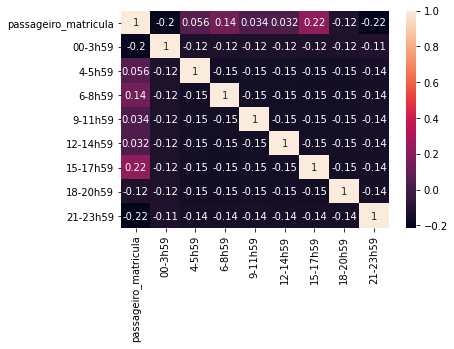

In [55]:
sb.heatmap(v_hora_range.drop(columns=["linha_numero"]).corr(), annot=True)

Existe uma certa correlação entre horário e a demanda. Notamos que horário entre 06h - 8h59 e 15h - 17h59 possuem uma demanda maior do que os outros horários. As menores demandas se encontram em horário noturno (após as 18h).

Existe uma certa demanda pela madrugada, provavelmente pelas pessoas que moram na região metropolitana ou muito distante de onde trabalham (o que necessita estas pegarem onibus mais cedo).

# Conectando info de bairros

In [115]:
paradas = pd.read_csv("../../data/raw/paradas.csv")
rota_paradas = pd.read_csv("../../data/raw/rota_paradas.csv")
rotas = pd.read_csv("../../data/raw/rotas.csv")

In [102]:
rota_paradas_merged = rota_paradas.merge(paradas, how="inner", on="stop_id")
rota_paradas_merged = rota_paradas_merged.merge(rotas, how="inner", on="route_id")

In [103]:
rotas_paradas_clean = rota_paradas_merged[["route_id", "stop_sequence", "district", "city"]]

In [104]:
rotas_paradas_clean

,route_id,stop_sequence,district,city
0,11,1,Centro,Fortaleza
1,11,2,Centro,Fortaleza
2,11,3,Centro,Fortaleza
3,11,4,Jacarecanga,Fortaleza
4,11,5,Centro,Fortaleza
...,...,...,...,...
8940,20,2,Pici,Fortaleza
8941,20,3,Pici,Fortaleza
8942,20,4,Pici,Fortaleza
8943,20,5,Pici,Fortaleza


In [105]:
rotas_paradas_clean.district.value_counts()

Centro                        383
Messejana                     336
Parangaba                     295
Barra do Ceará                225
Fátima                        202
                             ... 
Urucutuba                       4
Industrial                      3
Cararu                          2
Ellery                          2
Rodovia Estrada do Guarani      1
Name: district, Length: 130, dtype: int64

In [106]:
rotas_paradas_demanda = rotas_paradas_clean.merge(demanda_p_linha_dia, how="inner", left_on="route_id", right_on="linha_numero")

In [107]:
rotas_paradas_demanda.drop(columns=["route_id", "stop_sequence"], inplace=True)

In [108]:
rotas_paradas_demanda

,district,city,linha_numero,movimento_diario_data_mov,demanda_do_dia
0,Centro,Fortaleza,11,2021-08-31,1561
1,Centro,Fortaleza,11,2021-09-01,1567
2,Centro,Fortaleza,11,2021-09-02,1683
3,Centro,Fortaleza,11,2021-09-03,1739
4,Centro,Fortaleza,11,2021-09-04,814
...,...,...,...,...,...
58774,Edson Queiroz,Fortaleza,836,2021-09-02,933
58775,Edson Queiroz,Fortaleza,836,2021-09-03,856
58776,Edson Queiroz,Fortaleza,836,2021-09-04,535
58777,Edson Queiroz,Fortaleza,836,2021-09-05,348


In [109]:
rotas_paradas_demanda = rotas_paradas_demanda[rotas_paradas_demanda["city"] == "Fortaleza"]

In [110]:
rotas_paradas_demanda

,district,city,linha_numero,movimento_diario_data_mov,demanda_do_dia
0,Centro,Fortaleza,11,2021-08-31,1561
1,Centro,Fortaleza,11,2021-09-01,1567
2,Centro,Fortaleza,11,2021-09-02,1683
3,Centro,Fortaleza,11,2021-09-03,1739
4,Centro,Fortaleza,11,2021-09-04,814
...,...,...,...,...,...
58774,Edson Queiroz,Fortaleza,836,2021-09-02,933
58775,Edson Queiroz,Fortaleza,836,2021-09-03,856
58776,Edson Queiroz,Fortaleza,836,2021-09-04,535
58777,Edson Queiroz,Fortaleza,836,2021-09-05,348


In [111]:
dados_bairros = pd.read_csv("../../data/raw/dados_bairros.csv")

In [112]:
rotas_paradas_demanda.district.unique()

array(['Centro', 'Jacarecanga', 'Farias Brito', 'Benfica', 'Fátima',
       'São João do Tauape', 'Dionísio Torres', 'Aldeota', 'Papicu',
       'Varjota', 'Meireles', 'Carlito Pamplona', 'Barra do Ceará',
       'Álvaro Weyne', 'Floresta', 'Vila Velha', 'Jardim Guanabara',
       'Olavo Oliveira', 'Antônio Bezerra', 'Padre Andrade',
       'Conjunto Ceará I', 'Genibaú', 'Autran Nunes', 'Dom Lustosa',
       'Henrique Jorge', 'Jóquei Clube', 'Demócrito Rocha',
       'Couto Fernandes', 'Bela Vista', 'Rodolfo Teófilo',
       'Cristo Redentor', 'Granja Lisboa', 'Conjunto Ceará II', 'Pirambu',
       'Cocó', 'Presidente Kennedy', 'Cidade 2000',
       'Engenheiro Luciano Cavalcante', 'Salinas', 'Guararapes',
       'José Bonifácio', 'Săo Gerardo', 'Monte Castelo', 'Joaquim Távora',
       'Edson Queiroz', 'Pici', 'Amadeu Furtado', 'Parquelândia',
       'Parque Araxá', 'Parreão', 'Vila Uniăo', 'Parque Manibura',
       'José de Alencar', 'Lagoa Redonda', 'Curió', 'Cambeba', 'Guajeru',
  

In [125]:
# Retira acentos e barras (/ + termo) dos nomes dos bairros
from unidecode import unidecode

district = []
for index, row in rotas_paradas_demanda.iterrows():
  district_without_punt = unidecode(row["district"])
  district_without_barra = district_without_punt.split("/")[0]
  if district_without_barra.startswith("Parque "):
    district_without_barra = district_without_barra.replace("Parque ", "")
  if district_without_barra.startswith("Vila "):
    district_without_barra = district_without_barra.replace("Vila ", "")
  if district_without_barra.startswith("Prefeito "):
    district_without_barra = district_without_barra.replace("Prefeito ", "")
  district.append(district_without_barra.strip())
rotas_paradas_demanda["Bairro"] = district

district = []
for index, row in dados_bairros.iterrows():
  district_without_punt = unidecode(row["Bairros"])
  district_without_barra = district_without_punt.split("/")[0]
  if district_without_barra.startswith("Parque "):
    district_without_barra = district_without_barra.replace("Parque ", "")
  if district_without_barra.startswith("Vila "):
    district_without_barra = district_without_barra.replace("Vila ", "")
  if district_without_barra.startswith("Prefeito "):
    district_without_barra = district_without_barra.replace("Prefeito ", "")
  district.append(district_without_barra.strip())
dados_bairros["Bairro"] = district

<ipython-input-125-3d6374477438>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotas_paradas_demanda["Bairro"] = district


In [126]:
dados_bairros["Bairro"].sort_values().unique()

array(['Aerolandia', 'Aeroporto', 'Aldeota', 'Alto da Balanca',
       'Alvaro Weyne', 'Amadeu Furtado', 'Ancuri', 'Antonio Bezerra',
       'Aracape', 'Araxa', 'Autran Nunes', 'Barra do Ceara', 'Barroso',
       'Bela Vista', 'Benfica', 'Boa Vista', 'Bom Futuro', 'Bom Jardim',
       'Bonsucesso', 'Cais do Porto', 'Cajazeiras', 'Cambeba',
       'Canindezinho', 'Carlito Pamplona', 'Centro', 'Cidade 2000',
       'Cidade dos Funcionarios', 'Coacu', 'Coco', 'Conjunto Ceara I',
       'Conjunto Ceara II', 'Conjunto Esperanca', 'Conjunto Palmeiras',
       'Couto Fernandes', 'Cristo Redentor', 'Curio', 'Damas',
       'De Lourdes', 'Democrito Rocha', 'Dende', 'Dias Macedo',
       'Dionisio Torres', 'Dois Irmaos', 'Dom Lustosa', 'Edson Queiroz',
       'Ellery', 'Engenheiro Luciano Cavalcante', 'Farias Brito',
       'Fatima', 'Floresta', 'Genibau', 'Granja Lisboa',
       'Granja Portugal', 'Guajeru', 'Guararapes', 'Henrique Jorge',
       'Iracema', 'Itaoca', 'Itaperi', 'Jacarecanga', '

In [127]:
rotas_paradas_demanda["Bairro"] = rotas_paradas_demanda["Bairro"].str.lower()
rotas_paradas_demanda["Bairro"] = rotas_paradas_demanda["Bairro"].str.replace("ç", "c")
dados_bairros["Bairro"] = dados_bairros["Bairro"].str.lower()

<ipython-input-127-bee6686e698f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotas_paradas_demanda["Bairro"] = rotas_paradas_demanda["Bairro"].str.lower()
<ipython-input-127-bee6686e698f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotas_paradas_demanda["Bairro"] = rotas_paradas_demanda["Bairro"].str.replace("ç", "c")


In [128]:
rotas_paradas_demanda.Bairro.unique()

array(['centro', 'jacarecanga', 'farias brito', 'benfica', 'fatima',
       'sao joao do tauape', 'dionisio torres', 'aldeota', 'papicu',
       'varjota', 'meireles', 'carlito pamplona', 'barra do ceara',
       'alvaro weyne', 'floresta', 'velha', 'jardim guanabara',
       'olavo oliveira', 'antonio bezerra', 'padre andrade',
       'conjunto ceara i', 'genibau', 'autran nunes', 'dom lustosa',
       'henrique jorge', 'joquei clube', 'democrito rocha',
       'couto fernandes', 'bela vista', 'rodolfo teofilo',
       'cristo redentor', 'granja lisboa', 'conjunto ceara ii', 'pirambu',
       'coco', 'presidente kennedy', 'cidade 2000',
       'engenheiro luciano cavalcante', 'salinas', 'guararapes',
       'jose bonifacio', 'sao gerardo', 'monte castelo', 'joaquim tavora',
       'edson queiroz', 'pici', 'amadeu furtado', 'parquelandia', 'araxa',
       'parreao', 'uniao', 'manibura', 'jose de alencar', 'lagoa redonda',
       'curio', 'cambeba', 'guajeru', 'parangaba', 'montese', 'd

In [129]:
rotas_paradas_bairro = list(rotas_paradas_demanda.Bairro.sort_values().unique())

In [130]:
dados_bairros_bairro = list(dados_bairros.Bairro.sort_values().unique())

In [131]:
[x for x in dados_bairros_bairro if not x in rotas_paradas_bairro or rotas_paradas_bairro.remove(x)]
# Tentar entender pq esses bairros não estão dando match

[]

In [135]:
dados_bairros

,Bairros,IDH em 2010[8],populaçao em 2020,Bairro
0,Aerolandia,0.311,12445,aerolandia
1,Aeroporto,0.177,9442,aeroporto
2,Aldeota,0.867,46411,aldeota
3,Alto da Balança,0.347,14039,alto da balanca
4,Alvaro Weyne,0.365,25955,alvaro weyne
...,...,...,...,...
116,Vicente Pinzon,0.331,8614,vicente pinzon
117,Vila Manoel Satiro,0.292,19197,manoel satiro
118,Vila Peri,0.342,22619,peri
119,Vila Uniao,0.467,16848,uniao


In [139]:
rotas_demanda_bairro = rotas_paradas_demanda.merge(dados_bairros, how="inner", left_on="Bairro", right_on="Bairro")

In [140]:
rotas_demanda_bairro

,district,city,linha_numero,movimento_diario_data_mov,demanda_do_dia,Bairro,Bairros,IDH em 2010[8],populaçao em 2020
0,Centro,Fortaleza,11,2021-08-31,1561,centro,Centro,0.557,31268
1,Centro,Fortaleza,11,2021-09-01,1567,centro,Centro,0.557,31268
2,Centro,Fortaleza,11,2021-09-02,1683,centro,Centro,0.557,31268
3,Centro,Fortaleza,11,2021-09-03,1739,centro,Centro,0.557,31268
4,Centro,Fortaleza,11,2021-09-04,814,centro,Centro,0.557,31268
...,...,...,...,...,...,...,...,...,...
57965,Ellery,Fortaleza,108,2021-09-02,1155,ellery,Ellery,0.416,31657
57966,Ellery,Fortaleza,108,2021-09-03,1144,ellery,Ellery,0.416,31657
57967,Ellery,Fortaleza,108,2021-09-04,657,ellery,Ellery,0.416,31657
57968,Ellery,Fortaleza,108,2021-09-05,69,ellery,Ellery,0.416,31657


In [142]:
rotas_demanda_bairro.groupby(["linha_numero"]).mean()[["demanda_do_dia", "IDH em 2010[8]"]].corr()

,demanda_do_dia,IDH em 2010[8]
demanda_do_dia,1.000000,0.246655
IDH em 2010[8],0.246655,1.000000


In [144]:
rotas_demanda_bairro.groupby(["linha_numero"]).mean()[["demanda_do_dia", "populaçao em 2020"]].corr()

,demanda_do_dia,populaçao em 2020
demanda_do_dia,1.000000,0.107566
populaçao em 2020,0.107566,1.000000


In [155]:
rotas_demanda = rotas_demanda_bairro.groupby(["linha_numero"]).mean()[["demanda_do_dia"]].reset_index()

In [156]:
rotas_idh_max = rotas_demanda_bairro.groupby(["linha_numero"]).max()[["IDH em 2010[8]"]].reset_index()

In [158]:
rotas_demanda.merge(rotas_idh_max, how="inner").corr()

,linha_numero,demanda_do_dia,IDH em 2010[8]
linha_numero,1.000000,-0.123162,-0.080735
demanda_do_dia,-0.123162,1.000000,0.468745
IDH em 2010[8],-0.080735,0.468745,1.000000


Aparentemente, a média do IDH dos bairros em que a rota passa e o maior IDH por onde ele passa tem leve correlação positiva com a demanda.

In [162]:
dados_bairros.describe()

,IDH em 2010[8],populaçao em 2020
count,121.000000,121.000000
mean,0.372116,22203.363636
std,0.184099,15102.332438
min,0.000000,1470.000000
25%,0.243000,11744.000000
50%,0.338000,17533.000000
75%,0.491000,30237.000000
max,0.953000,79346.000000


Dias da semana afetam a demanda?

In [14]:
demanda_p_linha_dia.movimento_diario_data_mov = pd.to_datetime(demanda_p_linha_dia.movimento_diario_data_mov)

In [19]:
demanda_p_linha_dia["Dia_Semana"] = demanda_p_linha_dia.movimento_diario_data_mov.dt.weekday

In [23]:
days_week ={
    0: 'Segunda', 
    1: 'Terça', 
    2: 'Quarta', 
    3: 'Quinta', 
    4: 'Sexta',
    5: 'Sábado', 
    6: 'Domingo'
}

In [25]:
demanda_p_linha_dia.Dia_Semana = demanda_p_linha_dia.Dia_Semana.map(days_week)

In [31]:
demanda_semana_linha = demanda_p_linha_dia.groupby(["linha_numero", "Dia_Semana"]).mean()[["demanda_do_dia"]].reset_index()

In [32]:
demanda_semana_linha

,linha_numero,Dia_Semana,demanda_do_dia
0,1,Domingo,2199.5
1,1,Quarta,8888.0
2,1,Quinta,8244.0
3,1,Segunda,8765.0
4,1,Sexta,9020.0
...,...,...,...
2039,942,Domingo,2.0
2040,991,Quarta,55.0
2041,991,Quinta,55.0
2042,991,Terça,76.0


In [35]:
demanda_semana_linha = pd.concat([demanda_semana_linha, pd.get_dummies(demanda_semana_linha["Dia_Semana"])], axis = 1)

In [36]:
demanda_semana_linha

,linha_numero,Dia_Semana,demanda_do_dia,Domingo,Quarta,Quinta,Segunda,Sexta,Sábado,Terça
0,1,Domingo,2199.5,1,0,0,0,0,0,0
1,1,Quarta,8888.0,0,1,0,0,0,0,0
2,1,Quinta,8244.0,0,0,1,0,0,0,0
3,1,Segunda,8765.0,0,0,0,1,0,0,0
4,1,Sexta,9020.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2039,942,Domingo,2.0,1,0,0,0,0,0,0
2040,991,Quarta,55.0,0,1,0,0,0,0,0
2041,991,Quinta,55.0,0,0,1,0,0,0,0
2042,991,Terça,76.0,0,0,0,0,0,0,1


In [39]:
demanda_semana_linha.drop(columns=["Dia_Semana"], inplace = True)

<AxesSubplot:>

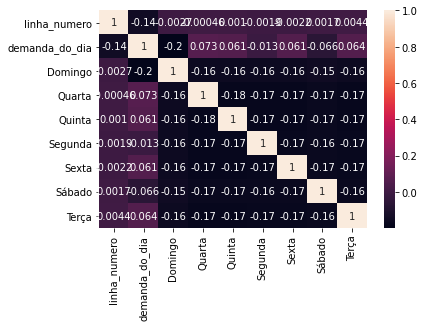

In [41]:
sb.heatmap(demanda_semana_linha.corr(), annot=True)

Aparentemente, apenas Domingo possui uma correlação consideravel com a demanda. Os outros dias não esboçam alguma correlação.